In [7]:
import os, sys
from glob import glob
from utils import p2r, stack_features, word2sense, regression, cv_regression_w2s, image_to_tensor, Subject, listdir, correlation
import numpy as np
from tqdm import tqdm

import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from collections import OrderedDict 
import string

In [5]:
# Setup w2s
w2s_file = "ThingsWrd2Sns.txt"
_, w2s_embeddings = word2sense(w2s_file)
nDim = 2250
w2s = np.zeros((1470, 2250))

# Cat's new word2vec (312 categories)
embedding_file = "ThingsWrd2Vec_subset.txt"
f = open(embedding_file, 'r', encoding='utf-8')
wordvec2lines = f.readlines()
f.close()

# Setup features
nfeat = 0
for l in condition_features.item().get('aardvark'):
    if l.shape[0] == 4096:
        continue
    nfeat = nfeat + l.shape[0]
    print(l.shape)
print(nfeat)
features = np.zeros((len(w2s_embeddings), nfeat))
condition_features = np.load('features_all_unflattened.npy', allow_pickle=True)
idx = 0
for i, condition in enumerate(condition_features.item()):
    c_name = condition.split('/')[-1]
    if c_name in w2s_embeddings:
        feat = 0
        for l, layer in enumerate(condition_features.item().get(condition)):
            if layer.shape[0] == 4096:
                continue
            for filt in range(layer.shape[0]):
                features[idx, feat] = np.amax(np.array(layer[filt]))
                feat = feat + 1
        idx = idx + 1

# Setup voxels
voxels = np.zeros((1470, 200))
idx = 0
for i, c in enumerate(condition_features.item()):
    c_name = c.split('/')[-1]
    if c_name in w2s_embeddings:
        voxel = np.load('./predicted_EVC_conv5' + '/' + c_name + '/' + c_name + '.npy')
        #print(voxel.shape)
        voxels[idx, :] = voxel
        w2s[idx, :] = w2s_embeddings[c_name]
        idx = idx + 1

torch.Size([192, 15, 15])
torch.Size([384, 15, 15])
torch.Size([256, 15, 15])
torch.Size([256, 7, 7])
1088


In [8]:
feat_by_voxel = np.zeros((nfeat, 200))
feat_by_dim = np.zeros((nfeat, 2250))



for i in range(nfeat):
    for j in range(200):
        feat_by_voxel[i, j] = (correlation(features[:, i], voxels[:, j]))

for i in range(nfeat):
    for j in range(2250):
        feat_by_dim[i, j] = (correlation(features[:, i], w2s[:, j]))

r_threshold1 = p2r(0.05/200, 1470)
r_threshold2 = p2r(0.05/2250, 1470)

In [20]:
feat_by_voxel_score = np.zeros(nfeat)
feat_by_dim_score = np.zeros(nfeat)

for n in range(nfeat):
    feat_by_voxel_score[n] = (np.sum(feat_by_voxel[n, :] > r_threshold1))
    feat_by_dim_score[n] = (np.sum(feat_by_dim[n, :] > r_threshold2))

feat_by_voxel_max = np.zeros(nfeat)
feat_by_dim_max = np.zeros(nfeat)

for n in range(nfeat):
    feat_by_voxel_max[n] = np.nanmax(feat_by_voxel[n, :])
    feat_by_dim_max[n] = np.nanmax(feat_by_dim[n, :])

feat_by_voxel_mean = np.zeros(nfeat)
feat_by_dim_mean = np.zeros(nfeat)

for n in range(nfeat):
    feat_by_voxel_mean[n] = np.nanmean(feat_by_voxel[n, :])
    feat_by_dim_mean[n] = np.nanmean(feat_by_dim[n, :])

feat_by_voxel_median = np.zeros(nfeat)
feat_by_dim_median = np.zeros(nfeat)

for n in range(nfeat):
    feat_by_voxel_median[n] = np.nanmedian(feat_by_voxel[n, :])
    feat_by_dim_median[n] = np.nanmedian(feat_by_dim[n, :])

-0.019296831148861368
-0.4707960603925309
0.0603251434085144
-0.4135563682462228


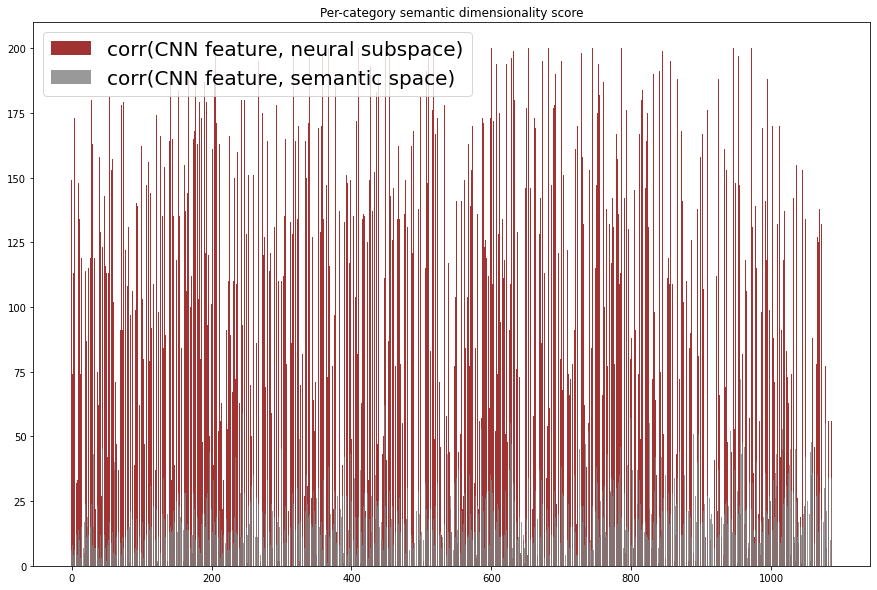

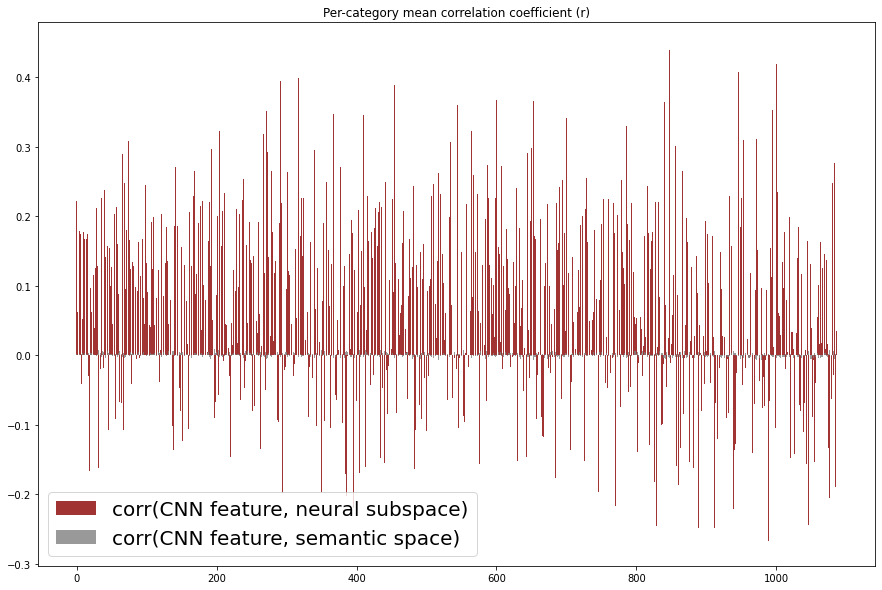

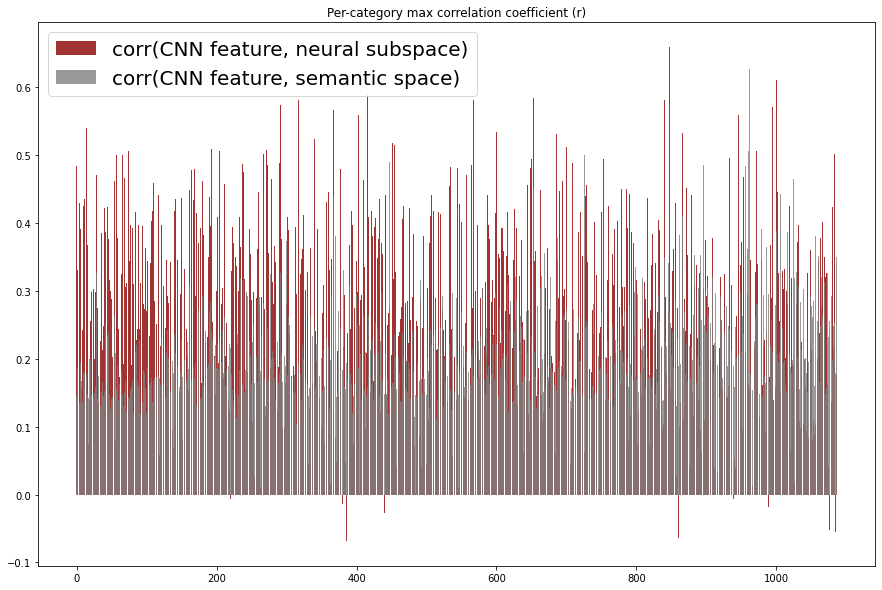

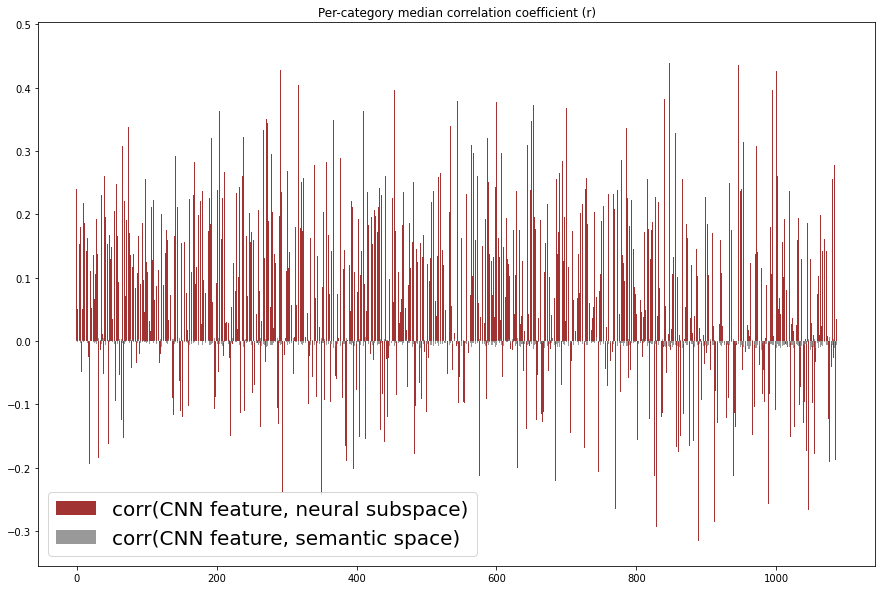

In [31]:
print(correlation(feat_by_voxel_score, feat_by_dim_score))
print(correlation(feat_by_voxel_mean, feat_by_dim_mean))
print(correlation(feat_by_voxel_max, feat_by_dim_max))
print(correlation(feat_by_voxel_median, feat_by_dim_median))

fig = plt.figure(figsize=(15, 10))
plt.title("Per-category semantic dimensionality score")
plt.bar(range(0,nfeat), feat_by_voxel_score, color='darkred', label='corr(CNN feature, neural subspace)', alpha=0.8)
plt.bar(range(0,nfeat), feat_by_dim_score, color='grey', label='corr(CNN feature, semantic space)', alpha=0.8)
plt.legend(prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(15, 10))
plt.title("Per-category mean correlation coefficient (r)")
plt.bar(range(0,nfeat), feat_by_voxel_mean, color='darkred', label='corr(CNN feature, neural subspace)', alpha=0.8)
plt.bar(range(0,nfeat), feat_by_dim_mean, color='grey', label='corr(CNN feature, semantic space)', alpha=0.8)
plt.legend(prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(15, 10))
plt.title("Per-category max correlation coefficient (r)")
plt.bar(range(0,nfeat), feat_by_voxel_max, color='darkred', label='corr(CNN feature, neural subspace)', alpha=0.8)
plt.bar(range(0,nfeat), feat_by_dim_max, color='grey', label='corr(CNN feature, semantic space)', alpha=0.8)
plt.legend(prop={'size': 20})
plt.show()

fig = plt.figure(figsize=(15, 10))
plt.title("Per-category median correlation coefficient (r)")
plt.bar(range(0,nfeat), feat_by_voxel_median, color='darkred', label='corr(CNN feature, neural subspace)', alpha=0.8)
plt.bar(range(0,nfeat), feat_by_dim_median, color='grey', label='corr(CNN feature, semantic space)', alpha=0.8)
plt.legend(prop={'size': 20})
plt.show()